# **PART I - PREPROCESSING & CLUSTERING**

In [ ]:
import os
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt


from sklearn.cluster       import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab          import drive
from google.colab          import files

pd.set_option('display.max_columns',  None)
pd.set_option('display.max_colwidth', None)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your Excel file
file_path = "/content/drive/MyDrive/McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2021.xlsx"

## 1. Data wrangling

In [ ]:
# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Print all sheet names
print("Available sheets:", excel_file.sheet_names)

# Load specific sheets into DataFrames
factors_df = excel_file.parse("1.2 Factors")
proximates_df = excel_file.parse("1.3 Proximates")
inorganics_df = excel_file.parse("1.4 Inorganics")
vitamins_df = excel_file.parse("1.5 Vitamins")

Available sheets: ['List of tables', '1.1 Notes', '1.2 Factors', '1.3 Proximates', '1.4 Inorganics', '1.5 Vitamins', '1.6 Vitamin Fractions', '1.7 (SFA per 100gFA)', '1.8 (SFA per 100gFood)', '1.9 (MUFA per 100FA)', '1.10 (MUFA per 100gFood)', '1.11 (PUFA per 100gFA)', '1.12 (PUFA per 100gFood)', '1.13 Phytosterols', '1.14 Organic Acids']


In [ ]:
dfs = [factors_df, proximates_df, inorganics_df, vitamins_df]

In [ ]:
for df in dfs:
    df.dropna(subset=["Food Code"], inplace=True)

In [ ]:
print(factors_df.shape)
factors_df.head()

(2887, 12)


,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Edible proportion,Specific gravity,Total solids,Nitrogen conversion factor,Glycerol conversion factor
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Supplement, 1991",NaN,N,NaN,NaN,NaN,0.8
3,13-146,"Agar, dried",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,1.00,NaN,NaN,NaN,NaN
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,1.00,NaN,NaN,NaN,NaN
5,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,NaN,"Vegetables, Herbs and Spices Supplement, 1991",NaN,1.00,NaN,NaN,NaN,NaN
6,13-801,"Allspice, ground",Literature sources,H,NaN,"Marsh et al. (1977) Composition of foods: spices and herbs, raw, processed and prepared, Agriculture Handbook No. 8-2",NaN,1.00,NaN,NaN,NaN,NaN


In [ ]:
factors_df.columns = factors_df.columns.str.strip()  # Remove leading/trailing whitespace
factors_df.columns = factors_df.columns.str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with single space

# List of columns to drop
columns_to_drop = [
    "Previous",
    "Main data references",
    "Footnote",
    "Specific gravity",
    "Total solids",
]

# Drop columns (if they exist)
factors_df = factors_df.drop(columns=[col for col in columns_to_drop if col in factors_df.columns])

In [ ]:
factors_df.head()

,Food Code,Food Name,Description,Group,Edible proportion,Nitrogen conversion factor,Glycerol conversion factor
2,13-145,"Ackee, canned, drained",8 cans,DG,N,NaN,0.8
3,13-146,"Agar, dried",Literature sources,DG,1.00,NaN,NaN
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,1.00,NaN,NaN
5,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,1.00,NaN,NaN
6,13-801,"Allspice, ground",Literature sources,H,1.00,NaN,NaN


In [ ]:
proximates_df.head()

,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Oligosaccharide (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g FA (g),Satd FA /100g fd (g),n-6 poly /100g FA (g),n-6 poly /100g food (g),n-3 poly /100g FA (g),n-3 poly /100g food (g),cis-Mono FA /100g FA (g),cis-Mono FA /100g Food (g),Mono FA/ 100g FA (g),Mono FA /100g food (g),cis-Polyu FA /100g FA (g),cis-Poly FA /100g Food (g),Poly FA /100g FA (g),Poly FA /100g food (g),Sat FA excl Br /100g FA (g),Sat FA excl Br /100g food (g),Branched chain FA /100g FA (g),Branched chain FA /100g food (g),Trans FAs /100g FA (g),Trans FAs /100g food (g),Cholesterol (mg)
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Supplement, 1991",NaN,76.7,0.46,2.9,15.2,0.8,151,625,Tr,NaN,0.8,0.1,0.0,Tr,0.7,0.0,0.0,NaN,N,NaN,NaN,N,4.30,0.52,0.60,0.07,58.50,7.11,NaN,N,4.90,0.60,NaN,N,36.50,4.44,0.10,0.01,0.00,0.00,0.0
3,13-146,"Agar, dried",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,9.7,0.26,1.3,1.2,Tr,16,67,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,81.1,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,84.2,0.03,0.2,0.1,Tr,2,7,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tr,NaN,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,NaN,"Vegetables, Herbs and Spices Supplement, 1991",NaN,93.4,0.64,4.0,0.7,0.4,24,100,Tr,NaN,0.3,0.1,0.0,0.2,Tr,0.0,0.0,NaN,1.7,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,13-801,"Allspice, ground",Literature sources,H,NaN,"Marsh et al. (1977) Composition of foods: spices and herbs, raw, processed and prepared, Agriculture Handbook No. 8-2",NaN,8.5,0.98,6.1,8.7,N,N,N,N,NaN,N,N,0.0,N,N,0.0,0.0,NaN,N,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
proximates_df.columns = proximates_df.columns.str.strip()  # Remove leading/trailing whitespace
proximates_df.columns = proximates_df.columns.str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with single space

# List of columns to drop
columns_to_drop = [
    "Previous",
    "Main data references",
    "Footnote",
    "Food Name",
    "Description",
    "Group",
]

# Drop columns (if they exist)
proximates_df = proximates_df.drop(columns=[col for col in columns_to_drop if col in proximates_df.columns])

In [ ]:
proximates_df.head()

,Food Code,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Oligosaccharide (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g FA (g),Satd FA /100g fd (g),n-6 poly /100g FA (g),n-6 poly /100g food (g),n-3 poly /100g FA (g),n-3 poly /100g food (g),cis-Mono FA /100g FA (g),cis-Mono FA /100g Food (g),Mono FA/ 100g FA (g),Mono FA /100g food (g),cis-Polyu FA /100g FA (g),cis-Poly FA /100g Food (g),Poly FA /100g FA (g),Poly FA /100g food (g),Sat FA excl Br /100g FA (g),Sat FA excl Br /100g food (g),Branched chain FA /100g FA (g),Branched chain FA /100g food (g),Trans FAs /100g FA (g),Trans FAs /100g food (g),Cholesterol (mg)
2,13-145,76.7,0.46,2.9,15.2,0.8,151,625,Tr,NaN,0.8,0.1,0.0,Tr,0.7,0.0,0.0,NaN,N,NaN,NaN,N,4.30,0.52,0.60,0.07,58.50,7.11,NaN,N,4.90,0.60,NaN,N,36.50,4.44,0.10,0.01,0.00,0.00,0.0
3,13-146,9.7,0.26,1.3,1.2,Tr,16,67,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,81.1,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,13-147,84.2,0.03,0.2,0.1,Tr,2,7,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tr,NaN,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,13-148,93.4,0.64,4.0,0.7,0.4,24,100,Tr,NaN,0.3,0.1,0.0,0.2,Tr,0.0,0.0,NaN,1.7,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,13-801,8.5,0.98,6.1,8.7,N,N,N,N,NaN,N,N,0.0,N,N,0.0,0.0,NaN,N,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
inorganics_df.head()

,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg)
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Supplement, 1991",NaN,240,270,35,40,47,0.70,0.27,0.6,340,N,N,Tr
3,13-146,"Agar, dried",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,110,110,760,620,50,20.60,N,14.4,N,4.30,N,N
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,10,20,110,75,8,3.50,N,2.5,N,0.40,N,N
5,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,NaN,"Vegetables, Herbs and Spices Supplement, 1991",NaN,6,79,32,27,70,1.00,0.16,0.9,N,0.20,N,N
6,13-801,"Allspice, ground",Literature sources,H,NaN,"Marsh et al. (1977) Composition of foods: spices and herbs, raw, processed and prepared, Agriculture Handbook No. 8-2",NaN,77,1040,660,130,110,7.10,0.55,1.0,N,1.70,N,N


In [ ]:
inorganics_df.columns = inorganics_df.columns.str.strip()  # Remove leading/trailing whitespace
inorganics_df.columns = inorganics_df.columns.str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with single space

# List of columns to drop
columns_to_drop = [
    "Previous",
    "Main data references",
    "Footnote",
    "Food Name",
    "Description",
    "Group",
]

# Drop columns (if they exist)
inorganics_df = inorganics_df.drop(columns=[col for col in columns_to_drop if col in inorganics_df.columns])

In [ ]:
inorganics_df.head()

,Food Code,Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg)
2,13-145,240,270,35,40,47,0.70,0.27,0.6,340,N,N,Tr
3,13-146,110,110,760,620,50,20.60,N,14.4,N,4.30,N,N
4,13-147,10,20,110,75,8,3.50,N,2.5,N,0.40,N,N
5,13-148,6,79,32,27,70,1.00,0.16,0.9,N,0.20,N,N
6,13-801,77,1040,660,130,110,7.10,0.55,1.0,N,1.70,N,N


In [ ]:
vitamins_df.head()

,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Vitamin K1 (µg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg)
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Supplement, 1991",NaN,0,N,N,0.0,N,NaN,0.03,0.07,0.6,0.5,1.1,0.06,0.0,41,N,N,30
3,13-146,"Agar, dried",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,0,0,0,0.0,Tr,NaN,0.01,0.22,0.2,N,N,Tr,0.0,0,Tr,Tr,0
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,NaN,"Wu Leung et al. (1972) Food composition table for use in East Asia, Food and Agriculature Organization and US Department of Health",NaN,0,0,0,0.0,Tr,NaN,0.01,0.04,0.1,N,N,Tr,0.0,0,Tr,Tr,0
5,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,NaN,"Vegetables, Herbs and Spices Supplement, 1991",NaN,0,96,16,0.0,N,NaN,0.04,0.06,0.5,0.6,1.1,0.03,0.0,36,0.56,N,2
6,13-801,"Allspice, ground",Literature sources,H,NaN,"Marsh et al. (1977) Composition of foods: spices and herbs, raw, processed and prepared, Agriculture Handbook No. 8-2",NaN,0,325,54,0.0,N,NaN,0.10,0.06,2.9,N,N,N,0.0,0,N,N,0


In [ ]:
vitamins_df.columns = vitamins_df.columns.str.strip()  # Remove leading/trailing whitespace
vitamins_df.columns = vitamins_df.columns.str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with single space

# List of columns to drop
columns_to_drop = [
    "Previous",
    "Main data references",
    "Footnote",
    "Food Name",
    "Description",
    "Group",
]

# Drop columns (if they exist)
vitamins_df = vitamins_df.drop(columns=[col for col in columns_to_drop if col in vitamins_df.columns])

In [ ]:
vitamins_df.head()

,Food Code,Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Vitamin K1 (µg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg)
2,13-145,0,N,N,0.0,N,NaN,0.03,0.07,0.6,0.5,1.1,0.06,0.0,41,N,N,30
3,13-146,0,0,0,0.0,Tr,NaN,0.01,0.22,0.2,N,N,Tr,0.0,0,Tr,Tr,0
4,13-147,0,0,0,0.0,Tr,NaN,0.01,0.04,0.1,N,N,Tr,0.0,0,Tr,Tr,0
5,13-148,0,96,16,0.0,N,NaN,0.04,0.06,0.5,0.6,1.1,0.03,0.0,36,0.56,N,2
6,13-801,0,325,54,0.0,N,NaN,0.10,0.06,2.9,N,N,N,0.0,0,N,N,0


In [ ]:
df = pd.merge(
    pd.merge(
        pd.merge(factors_df, proximates_df, on='Food Code', how='inner'),
        inorganics_df, on='Food Code', how='inner'
    ),
    vitamins_df, on='Food Code', how='inner'
)

In [ ]:
print(df.shape)
df.head()

(2901, 76)


,Food Code,Food Name,Description,Group,Edible proportion,Nitrogen conversion factor,Glycerol conversion factor,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Oligosaccharide (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g FA (g),Satd FA /100g fd (g),n-6 poly /100g FA (g),n-6 poly /100g food (g),n-3 poly /100g FA (g),n-3 poly /100g food (g),cis-Mono FA /100g FA (g),cis-Mono FA /100g Food (g),Mono FA/ 100g FA (g),Mono FA /100g food (g),cis-Polyu FA /100g FA (g),cis-Poly FA /100g Food (g),Poly FA /100g FA (g),Poly FA /100g food (g),Sat FA excl Br /100g FA (g),Sat FA excl Br /100g food (g),Branched chain FA /100g FA (g),Branched chain FA /100g food (g),Trans FAs /100g FA (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Vitamin K1 (µg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg)
0,13-145,"Ackee, canned, drained",8 cans,DG,N,NaN,0.8,76.7,0.46,2.9,15.2,0.8,151,625,Tr,NaN,0.8,0.1,0.0,Tr,0.7,0.0,0.0,NaN,N,NaN,NaN,N,4.30,0.52,0.60,0.07,58.50,7.11,NaN,N,4.90,0.60,NaN,N,36.50,4.44,0.10,0.01,0.00,0.00,0.0,240,270,35,40,47,0.70,0.27,0.6,340,N,N,Tr,0,N,N,0.0,N,NaN,0.03,0.07,0.6,0.5,1.1,0.06,0.0,41,N,N,30
1,13-146,"Agar, dried",Literature sources,DG,1.00,NaN,NaN,9.7,0.26,1.3,1.2,Tr,16,67,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,81.1,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0,110,110,760,620,50,20.60,N,14.4,N,4.30,N,N,0,0,0,0.0,Tr,NaN,0.01,0.22,0.2,N,N,Tr,0.0,0,Tr,Tr,0
2,13-147,"Agar, dried, soaked and drained",Literature sources,DG,1.00,NaN,NaN,84.2,0.03,0.2,0.1,Tr,2,7,0.0,NaN,Tr,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tr,NaN,NaN,NaN,Tr,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10,20,110,75,8,3.50,N,2.5,N,0.40,N,N,0,0,0,0.0,Tr,NaN,0.01,0.04,0.1,N,N,Tr,0.0,0,Tr,Tr,0
3,13-148,"Alfalfa sprouts, raw",Analytical and literature sources,DG,1.00,NaN,NaN,93.4,0.64,4.0,0.7,0.4,24,100,Tr,NaN,0.3,0.1,0.0,0.2,Tr,0.0,0.0,NaN,1.7,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6,79,32,27,70,1.00,0.16,0.9,N,0.20,N,N,0,96,16,0.0,N,NaN,0.04,0.06,0.5,0.6,1.1,0.03,0.0,36,0.56,N,2
4,13-801,"Allspice, ground",Literature sources,H,1.00,NaN,NaN,8.5,0.98,6.1,8.7,N,N,N,N,NaN,N,N,0.0,N,N,0.0,0.0,NaN,N,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN,NaN,NaN,0.0,77,1040,660,130,110,7.10,0.55,1.0,N,1.70,N,N,0,325,54,0.0,N,NaN,0.10,0.06,2.9,N,N,N,0.0,0,N,N,0


In [ ]:
category_mapping = {
    "A": "Cereals and cereal products",
    "AA": "Flours, grains and starches",
    "AB": "Sandwiches",
    "AC": "Rice",
    "AD": "Pasta",
    "AE": "Pizzas",
    "AF": "Breads",
    "AG": "Rolls",
    "AI": "Breakfast cereals",
    "AK": "Infant cereal foods",
    "AM": "Biscuits",
    "AN": "Cakes",
    "AO": "Pastry",
    "AP": "Buns and pastries",
    "AS": "Puddings",
    "AT": "Savouries",

    "B": "Milk and milk products",
    "BA": "Cows milk",
    # "BAB": "Breakfast milk",
    # "BAE": "Skimmed milk",
    # "BAH": "Semi-skimmed milk",
    # "BAK": "Whole milk",
    # "BAN": "Channel Island milk",
    # "BAR": "Processed milks",
    "BC": "Other milks",
    "BF": "Infant formulas",
    # "BFD": "Whey-based modified milks",
    # "BFG": "Non-whey-based modified milks",
    # "BFJ": "Soya-based modified milks",
    # "BFP": "Follow-on formulas",
    "BH": "Milk-based drinks",
    "BJ": "Creams",
    # "BJC": "Fresh creams (pasteurised)",
    # "BJF": "Frozen creams (pasteurised)",
    # "BJL": "Sterilised creams",
    # "BJP": "UHT creams",
    # "BJS": "Imitation creams",
    "BL": "Cheeses",
    "BN": "Yogurts",
    # "BNE": "Whole milk yogurts",
    # "BNH": "Low fat yogurts",
    # "BNS": "Other yogurts",
    "BP": "Ice creams",
    "BR": "Puddings and chilled desserts",
    "BV": "Savoury dishes and sauces",

    "C": "Eggs",
    "CA": "Eggs",
    "CD": "Egg dishes",
    # "CDE": "Savoury egg dishes",
    # "CDH": "Sweet egg dishes",

    "D": "Vegetables",
    "DA": "Potatoes",
    # "DAE": "Early potatoes",
    # "DAM": "Main crop potatoes",
    # "DAP": "Chipped old potatoes",
    # "DAR": "Potato products",
    "DB": "Beans and lentils",
    "DF": "Peas",
    "DG": "Vegetables, general",
    "DI": "Vegetables, dried",
    "DR": "Vegetable dishes",

    "F": "Fruit",
    "FA": "Fruit, general",
    "FC": "Fruit juices",

    "G": "Nuts and seeds",
    "GA": "Nuts and seeds, general",

    "H": "Herbs and spices",

    "J": "Fish and fish products",
    "JA": "White fish",
    "JC": "Fatty fish",
    "JK": "Crustacea",
    "JM": "Molluscs",
    "JR": "Fish products and dishes",

    "M": "Meat and meat products",
    "MA": "Meat",
    "MAA": "Bacon",
    "MAC": "Beef",
    "MAE": "Lamb",
    "MAG": "Pork",
    "MAI": "Veal",
    "MC": "Poultry",
    "MCA": "Chicken",
    "MCC": "Duck",
    "MCE": "Goose",
    "MCG": "Grouse",
    "MCI": "Partridge",
    "MCK": "Pheasant",
    "MCM": "Pigeon",
    "MCO": "Turkey",
    "ME": "Game",
    "MEA": "Hare",
    "MEC": "Rabbit",
    "MEE": "Venison",
    "MG": "Offal",
    "MBG": "Burgers and grillsteaks",
    "MI": "Meat products",
    "MIG": "Other meat products",
    "MR": "Meat dishes",

    "O": "Fats and oils",
    "OA": "Spreading fats",
    "OB": "Animal fats",
    "OC": "Oils",
    "OE": "Non-animal fats",
    "OF": "Cooking fats",

    "P": "Beverages",
    "PA": "Powdered drinks, essences and infusions",
    "PAA": "Powdered drinks and essences",
    "PAC": "Infusions",
    "PC": "Soft drinks",
    "PCA": "Carbonated drinks",
    "PCC": "Squash and cordials",
    "PE": "Juices",

    "Q": "Alcoholic beverages",
    "QA": "Beers",
    "QC": "Ciders",
    "QE": "Wines",
    "QF": "Fortified wines",
    "QG": "Vermouths",
    "QI": "Liqueurs",
    "QK": "Spirits",

    "S": "Sugars, preserves and snacks",
    "SC": "Sugars, syrups and preserves",
    "SE": "Confectionery",
    "SEA": "Chocolate confectionery",
    "SEC": "Non-chocolate confectionery",
    "SN": "Savoury snacks",
    # "SNA": "Potato-based snacks",
    # "SNB": "Potato and mixed cereal snacks",
    # "SNC": "Non-potato snacks",

    "W": "Soups, sauces and miscellaneous foods",
    "WA": "Soups",
    # "WAA": "Homemade soups",
    # "WAC": "Canned soups",
    # "WAE": "Packet soups",
    "WC": "Sauces",
    # "WCD": "Dairy sauces",
    # "WCG": "Salad sauces, dressings and pickles",
    # "WCN": "Non-salad sauces",
    "WE": "Pickles and chutneys",
    "WY": "Miscellaneous foods"
}

In [ ]:
df["category"] = df["Group"].apply(lambda x: category_mapping.get(x[0], "Unknown"))

In [ ]:
def map_to_category(group):
    """
    Map a specific food group code to its corresponding category using a hierarchical approach.

    This function attempts to find the most specific category for a given group code
    by checking the `category_mapping` dictionary. If an exact match is not found,
    the function progressively removes the last character of the group code and retries,
    aiming to find a broader category. If no match is found, it defaults to "Unknown".

    Args:
        group (str): The group code representing a food item (e.g., "BAB", "BA", "B").

    Returns:
        str: The corresponding category name if found in the `category_mapping` dictionary,
             or "Unknown" if no match is found.
    """
    while group:
        if group in category_mapping:
            return category_mapping[group]
        group = group[:-1]  # Remove the last letter
    return "Unknown"  # Default if no match is found

# Apply mapping to create the new "category" column
df["subcategory"] = df["Group"].apply(map_to_category)

In [ ]:
df[df.Group == "BAB"] # check if it works.. it does!

,Food Code,Food Name,Description,Group,Edible proportion,Nitrogen conversion factor,Glycerol conversion factor,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Oligosaccharide (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g FA (g),Satd FA /100g fd (g),n-6 poly /100g FA (g),n-6 poly /100g food (g),n-3 poly /100g FA (g),n-3 poly /100g food (g),cis-Mono FA /100g FA (g),cis-Mono FA /100g Food (g),Mono FA/ 100g FA (g),Mono FA /100g food (g),cis-Polyu FA /100g FA (g),cis-Poly FA /100g Food (g),Poly FA /100g FA (g),Poly FA /100g food (g),Sat FA excl Br /100g FA (g),Sat FA excl Br /100g food (g),Branched chain FA /100g FA (g),Branched chain FA /100g food (g),Trans FAs /100g FA (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Vitamin K1 (µg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory
1660,12-321,"Milk, Channel Islands, whole, pasteurised","Breakfast milk, average of 6 samples of summer and winter milk",BAB,1.00,6.38,0.945,86.6,0.56,3.5,4.7,4.3,72,302,0.0,0.0,4.3,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,NaN,3.02,1.89,0.08,0.73,0.03,22.51,1.00,NaN,1.13,2.91,0.13,NaN,0.16,68.10,3.02,2.05,0.09,3.45,0.15,15.9,39,131,129,12,106,Tr,0.01,0.4,100,0.01,1,29,35,41,42,0.1,0.17,0.87,0.04,0.22,0.1,0.6,0.6,0.03,0.8,6,0.38,1.9,1,Milk and milk products,Cows milk
1661,12-322,"Milk, Channel islands, whole, summer",3 samples,BAB,1.00,6.38,0.945,86.7,0.61,3.9,4.7,4.1,73,306,0.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,4.1,0.0,0.0,0.0,67.28,2.99,NaN,NaN,NaN,NaN,24.41,1.08,27.84,1.24,3.34,0.15,4.10,0.18,NaN,NaN,NaN,NaN,4.19,0.19,16.0,39,131,129,12,106,Tr,0.01,0.4,100,0.01,1,24,70,82,84,0.1,0.17,NaN,0.04,0.22,0.1,0.6,0.6,0.03,0.8,6,0.38,1.9,1,Milk and milk products,Cows milk
1662,12-323,"Milk, Channel islands, whole, winter",3 samples,BAB,1.00,6.38,0.945,86.5,0.50,3.2,4.7,4.4,72,299,0.0,0.0,4.4,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0,0.0,73.20,3.25,NaN,NaN,NaN,NaN,20.79,0.92,23.05,1.02,2.75,0.12,3.19,0.14,NaN,NaN,NaN,NaN,2.70,0.12,15.7,39,131,129,12,106,Tr,0.01,0.4,100,0.01,1,34,Tr,Tr,Tr,0.1,0.17,NaN,0.04,0.22,0.1,0.6,0.6,0.03,0.8,6,0.38,1.9,Tr,Milk and milk products,Cows milk


In [ ]:
print(df.shape)

(2901, 78)


In [ ]:
threshold = 0.5  # Threshold for missing values (50%)
missing_percentage = df.isna().mean()  # Calculate percentage of missing values in each column
columns_to_drop = missing_percentage[missing_percentage > threshold].index  # Identify columns to drop

df = df.drop(columns=columns_to_drop)
print(f"Columns dropped: {list(columns_to_drop)}")
print(f"Remaining columns: {df.shape[1]}")

Columns dropped: ['Nitrogen conversion factor', 'Glycerol conversion factor', 'Oligosaccharide (g)', 'Satd FA /100g FA (g)', 'n-6 poly /100g FA (g)', 'n-6 poly /100g food (g)', 'n-3 poly /100g FA (g)', 'n-3 poly /100g food (g)', 'cis-Mono FA /100g FA (g)', 'cis-Mono FA /100g Food (g)', 'Mono FA/ 100g FA (g)', 'cis-Polyu FA /100g FA (g)', 'cis-Poly FA /100g Food (g)', 'Poly FA /100g FA (g)', 'Sat FA excl Br /100g FA (g)', 'Sat FA excl Br /100g food (g)', 'Branched chain FA /100g FA (g)', 'Branched chain FA /100g food (g)', 'Trans FAs /100g FA (g)', 'Vitamin K1 (µg)']
Remaining columns: 58


In [ ]:
print(df.shape)

(2901, 58)


In [ ]:
useless_categories = ["Beverages", "Alcoholic beverages", "Fats and oils"]
df = df[~df["category"].isin(useless_categories)]

In [ ]:
print(df.shape)

(2759, 58)


In [ ]:
# Drop rows where "raw" appears in the "Food Name" column
df = df[~df["Food Name"].str.contains("raw", case=False, na=False)]

In [ ]:
print(df.shape)

(2274, 58)


In [ ]:
n_categories = len(df["category"].unique())
n_subcategories = len(df["subcategory"].unique())

## 2. Visualizations

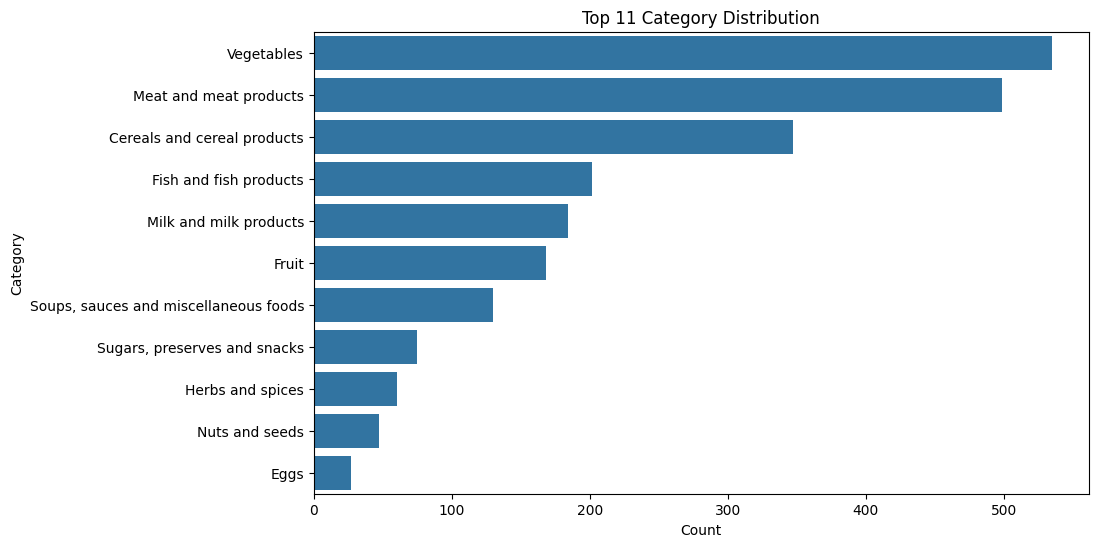

In [ ]:
top_n = n_categories
assert top_n <= n_categories
top_categories = df["category"].value_counts().nlargest(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f"Top {top_n} Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

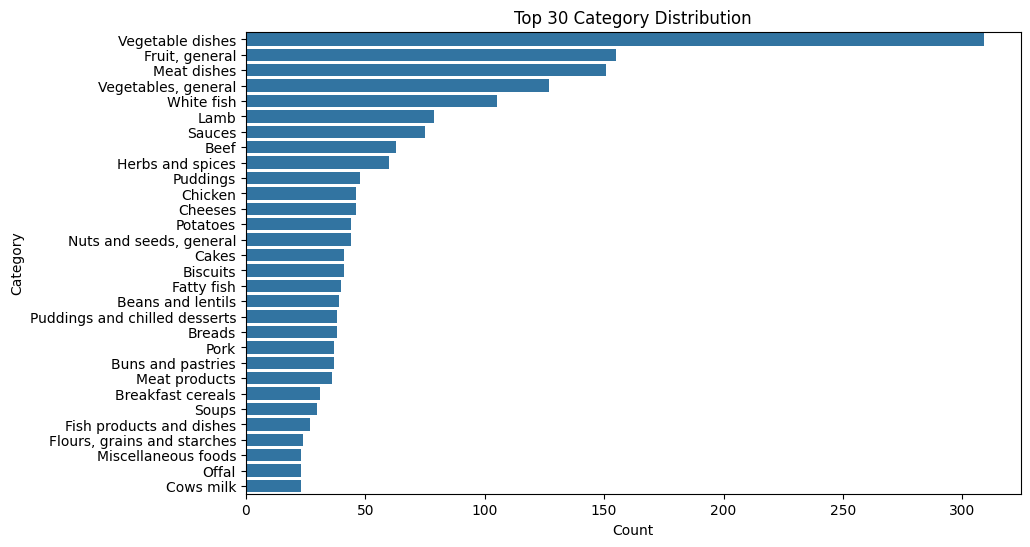

In [ ]:
top_n = 30
assert top_n <= n_subcategories
top_categories = df["subcategory"].value_counts().nlargest(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title(f"Top {top_n} Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Isma's Clustering

## 1. Cleaning & searchFood

In [ ]:
# Just a bit more cleaning
list_strings = ['Food Code', 'Food Name', 'Description', 'Group', 'category', 'subcategory']

for col in df.columns:
    if col not in list_strings:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Utility function to look up foods!
def searchFood(food_name, df):
    return df[df['Food Name'].str.contains(food_name, case=False, na=False)]

In [ ]:
searchFood("Pasta with meat", df)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory
1886,19-483,"Pasta with meat and tomato sauce, homemade",Recipe,MR,1.0,65.9,1.11,6.6,4.1,20.4,140.0,590.0,18.5,1.9,0.7,NaN,0.7,0.2,0.3,0.0,0.0,2.0,2.1,1.41,1.72,0.5,0.15,10.7,90.0,158.0,24.0,20.0,81.0,0.81,0.14,1.1,167.0,0.25,5.0,4.0,NaN,148.0,25.0,0.1,0.97,0.02,0.04,1.7,1.4,3.1,0.12,0.3,6.0,0.32,0.9,NaN,Meat and meat products,Meat dishes


In [ ]:
searchFood("White rice", df)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory
2370,15-863,"Risotto, white rice, vegetable, homemade","Risotto rice, vegetables, red kidney beans and cashew nuts. Recipe from Leeds Polytechnic",DR,1.0,68.4,0.69,3.8,6.1,18.5,139.0,586.0,16.3,1.7,0.5,NaN,0.5,0.6,0.0,0.0,NaN,2.2,NaN,0.71,3.41,1.62,NaN,0.0,74.0,250.0,24.0,28.0,100.0,0.94,0.19,0.8,NaN,0.3,7.0,NaN,0.0,82.0,14.0,0.0,1.06,0.13,0.09,1.0,0.9,1.9,0.1,0.0,27.0,0.54,NaN,18.0,Vegetables,Vegetable dishes


In [ ]:
searchFood("Potatoes, old, baked, flesh and skin", df)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory
2229,13-491,"Potatoes, old, baked, flesh and skin","22 samples, autumn and winter, including white and red varieties, pre-packed and loose",DAM,1.0,71.0,0.4,2.5,0.2,22.6,97.0,413.0,21.2,1.4,0.6,NaN,0.5,0.3,0.0,0.0,0.0,1.4,2.6,0.1,0.04,0.04,0.0,0.0,2.0,600.0,11.0,27.0,45.0,0.63,0.09,0.4,114.0,0.18,NaN,1.0,0.0,NaN,NaN,0.0,0.05,0.2,0.02,0.9,0.4,1.3,0.11,0.0,18.0,0.46,0.3,6.0,Vegetables,Potatoes


## 2. Clustering foods


Whenever I make meals, I choose my carbs to be either pasta, rice or potatoes. When searching these up on the table I notice they have around the same amount of carbohydrates (20g). Perhaps we could cluster nearby foods and call that a group of carbs? Then we'll do the same for the proteins and for the fibers. The labels we have in the data aren't relevant to this task (potatoes are labelled vegetables, pasta bolognaise is labelled meat product). Let's investigate.

### 2.1 Intuitive Approach

In [ ]:
df_sorted = df.sort_values(by='Carbohydrate (g)', ascending=False, inplace=False).copy()
df_sorted.reset_index(inplace=True)
row_start = searchFood("Potatoes, old, baked, flesh and skin", df_sorted)
row_end   = searchFood("White rice", df_sorted)

In [ ]:
df_sorted[['Food Name', 'Carbohydrate (g)', 'Total sugars (g)']].iloc[605:630]

,Food Name,Carbohydrate (g),Total sugars (g)
605,"Burger, chicken, takeaway",23.4,NaN
606,"Potatoes, new, frozen, `roast' in corn oil",23.4,1.0
607,"Pancakes, savoury, wholemeal, made with whole milk, homemade",23.4,4.0
608,Sweet potato and onion layer,23.3,6.8
609,"Ice cream bars/choc ices, non-dairy, with chocolate flavoured coating",23.2,20.5
610,"Welsh rarebit, homemade",23.1,2.4
611,"Samosas, lamb, baked, homemade",23.1,1.6
612,"Vegetable and cheese grill/burger, in crumbs, baked/grilled",23.0,1.3
613,"Peas, split, dried, boiled in unsalted water",22.7,0.9
614,"Pilau, vegetable, homemade",22.6,0.3


We get some new reasonable carbs here (Sweet potato, ...), but also a lot of items which shouldn't be labelled as such (Ice cream, ...). Let's try a standard k-means approach.

### 2.2 Raw K-means

In [ ]:
df_k = df[['Food Name', 'Carbohydrate (g)', 'Total sugars (g)', 'Protein (g)', 'AOAC fibre (g)']].copy()
df_k.dropna(inplace=True)

In [ ]:
std_df_k = StandardScaler().fit_transform(df_k.drop(columns=['Food Name', 'AOAC fibre (g)']))

wcss = []

k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_df_k)
    wcss.append(kmeans.inertia_)

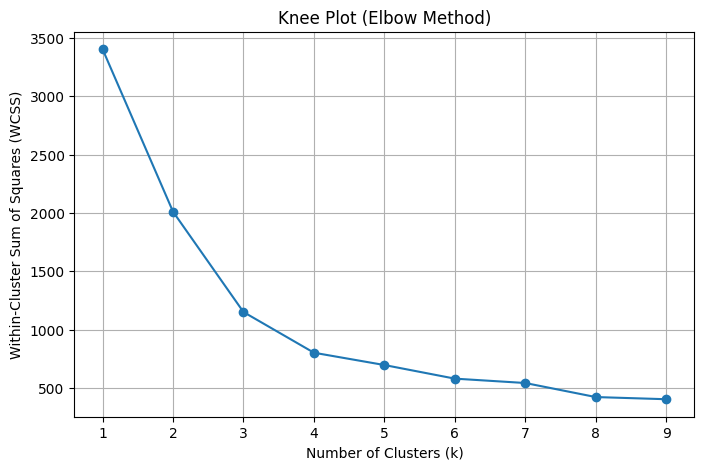

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Knee Plot (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

We choose $k=4$. Let's see if our clusters make sense.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123)

clusters = kmeans.fit_predict(std_df_k)

df_k['Cluster'] = clusters

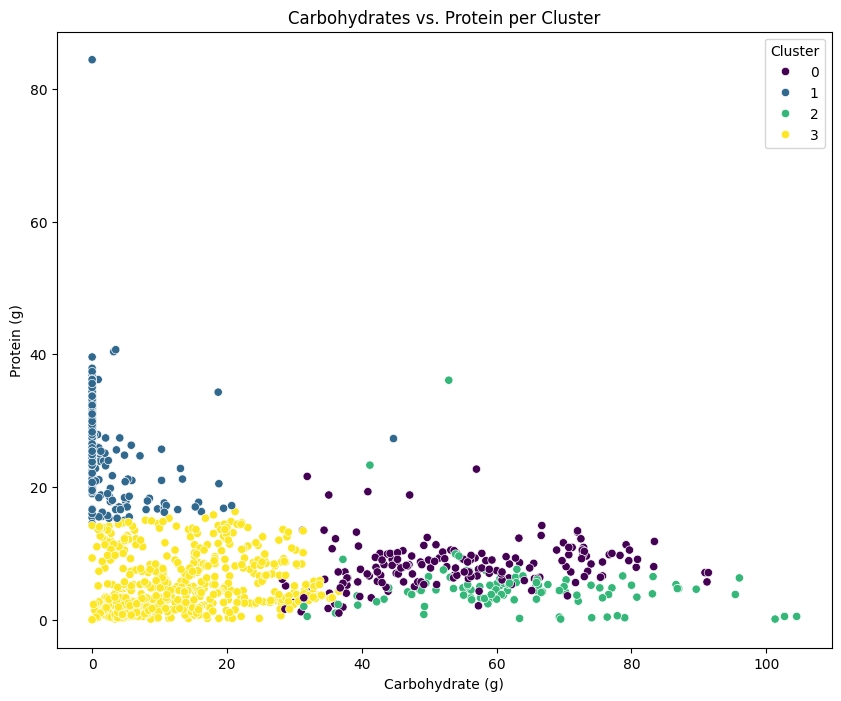

In [ ]:
# Let's visualize our clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Carbohydrate (g)', y='Protein (g)', hue='Cluster', data=df_k, palette='viridis')
plt.title('Carbohydrates vs. Protein per Cluster')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Protein (g)')
plt.show()

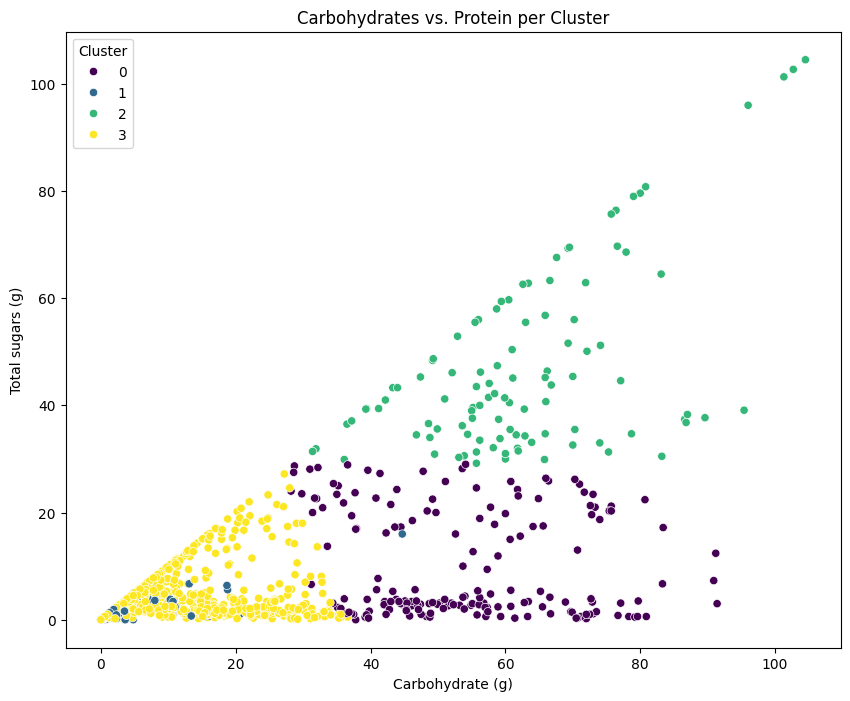

In [ ]:
# Let's visualize our clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Carbohydrate (g)', y='Total sugars (g)', hue='Cluster', data=df_k, palette='viridis')
plt.title('Carbohydrates vs. Protein per Cluster')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Total sugars (g)')
plt.show()

IF SEED WAS SUCCESSFULY SET, 0 SHOULD BE SWEETS, 1 PROTEINS, 2 EXTRA SWEETS, 3 VEGETABLES+CARBS

In [ ]:
def print_random_elements(df, n=10):
  """Prints n random elements from each cluster in the DataFrame."""
  for cluster in range(4):
      cluster_data = df[df['Cluster'] == cluster]
      size_cluster = len(cluster_data)
      if size_cluster > 0 :
        random_elements = cluster_data.sample(n=min(n, len(cluster_data)))
        print(f"Cluster {cluster} has {size_cluster} elements:")
        print(random_elements['Food Name'])
        print("\n")

print_random_elements(df_k)

Cluster 0 has 179 elements:
409                                 Bread, white, Danish style
1174                         Flour, wheat, bread/strong, white
2285                                            Puri, homemade
2007    Pie, apple, wholemeal, pastry top and bottom, homemade
1911                          Pastries, Greek, baklava, retail
1051                                       Doughnuts, with jam
443           Breakfast cereal, rice, toasted/crisp, fortified
1249                                    Gravy instant granules
2515                                 Scotch pancakes, homemade
2512                               Scones, wholemeal, homemade
Name: Food Name, dtype: object


Cluster 1 has 247 elements:
80                          Bacon rashers, back, microwaved
2456                          Sardines, flesh only, grilled
682         Chicken, breast, strips, stir-fried in corn oil
2118                  Pork, fillet medallions, grilled lean
1947                            Peanuts, 

In [ ]:
searchFood("Potatoes, old, baked, flesh and skin", df_k)

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster
2229,"Potatoes, old, baked, flesh and skin",22.6,1.4,2.5,2.6,3


In [ ]:
searchFood("Broccoli, green, steamed", df_k)

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster
458,"Broccoli, green, steamed",3.5,2.0,4.1,3.8,3


In [ ]:
searchFood("Chicken, light meat, roasted", df_k)

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster
706,"Chicken, light meat, roasted",0.0,0.0,30.2,0.0,1


This works well! Clearly cluster 1 is associated with high-protein food, often animal-sourced, when cluster 3 represents the vegetables and the carbs. Clusters 0 and 2 both stand for products that a healthy person wouldn't include in a meal (deserts, highly sweet items, ..) and the distinction between them is clear, with cluster 2 representing the worst items possible for your health.

## 2.3 Separating vegetables from carbs

In [ ]:
"""
# Let's massage the clusters a bit; label more proteins as proteins
for index, row in df_k.iterrows():
    if row['Protein (g)'] > 15 and row['Carbohydrate (g)'] < 22 and row['Cluster'] == 0:
        df_k.loc[index, 'Cluster'] = 2
    elif row['Cluster'] == 3:
        df_k.loc[index, 'Cluster'] = 1

# Visualize it
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Carbohydrate (g)', y='Protein (g)', hue='Cluster', data=df_k, palette='viridis')
plt.title('Carbohydrates vs. Protein per Cluster')
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Protein (g)')
plt.show()
"""

"\n# Let's massage the clusters a bit; label more proteins as proteins\nfor index, row in df_k.iterrows():\n    if row['Protein (g)'] > 15 and row['Carbohydrate (g)'] < 22 and row['Cluster'] == 0:\n        df_k.loc[index, 'Cluster'] = 2\n    elif row['Cluster'] == 3:\n        df_k.loc[index, 'Cluster'] = 1\n\n# Visualize it\nplt.figure(figsize=(10, 8))\nsns.scatterplot(x='Carbohydrate (g)', y='Protein (g)', hue='Cluster', data=df_k, palette='viridis')\nplt.title('Carbohydrates vs. Protein per Cluster')\nplt.xlabel('Carbohydrate (g)')\nplt.ylabel('Protein (g)')\nplt.show()\n"

In [ ]:
df_k_3 = df_k[df_k['Cluster'] == 3].copy()
df_k_3.drop(columns=['Cluster'], inplace=True)

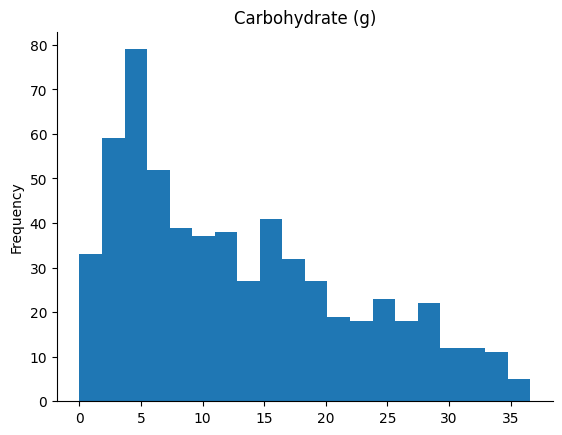

In [ ]:
# @title Carbohydrate (g)

from matplotlib import pyplot as plt
df_k_3['Carbohydrate (g)'].plot(kind='hist', bins=20, title='Carbohydrate (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

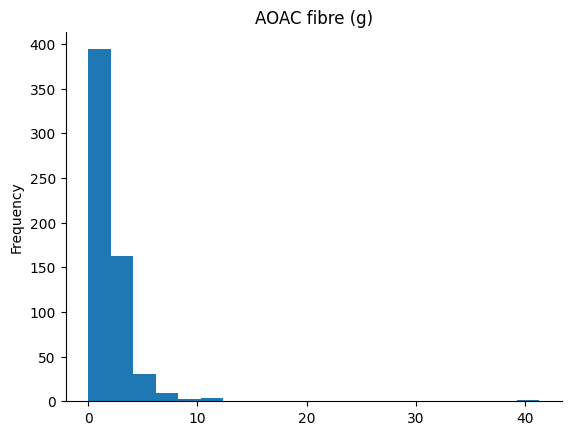

In [ ]:
# @title AOAC fibre (g)

from matplotlib import pyplot as plt
df_k_3['AOAC fibre (g)'].plot(kind='hist', bins=20, title='AOAC fibre (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)


No point in using Fibers as a way to subcluster into Vegetables and Carbs. Carbs seem to be the only variable with a lot of variance. No need to use k-means since it's only 1 dimension (random initialization would be annoying). Let's just cut at the mean.

In [ ]:
mean_carbs        = df_k_3['Carbohydrate (g)'].mean()
df_k_3['Subcluster'] = ['Vegetable' if carbs < mean_carbs else 'Carbs' for carbs in df_k_3['Carbohydrate (g)']]

In [ ]:
df_k_3

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Subcluster
7,"Almonds, weighed with shells",1.9,1.6,7.8,4.6,Vegetable
16,"Apple sauce, homemade",20.2,20.2,0.3,1.4,Carbs
17,"Apples, cooking, baked with sugar, flesh only",17.1,17.1,0.2,1.9,Carbs
18,"Apples, cooking, baked with sugar, flesh only, weighed with skin",14.3,14.3,0.2,1.6,Carbs
19,"Apples, cooking, baked without sugar, flesh only",11.4,11.4,0.2,2.0,Vegetable
...,...,...,...,...,...,...
2896,"Yogurt, whole milk, twin pot, not fruit",21.5,18.2,4.2,0.3,Carbs
2897,"Yogurt, whole milk, twin pot, thick and creamy with fruit",16.2,15.6,4.1,1.0,Carbs
2898,"Yorkshire pudding, made with semi-skimmed milk, homemade",25.6,3.5,6.7,1.1,Carbs
2899,"Yorkshire pudding, made with skimmed milk, homemade",25.9,3.6,6.8,1.1,Carbs


In [ ]:
df_k_3 = df_k_3[df_k_3["Food Name"] != "Beef, mince, stewed"]

In [ ]:
searchFood("Broccoli", df_k_3)

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Subcluster
452,"Broccoli in cheese sauce, made with semi-skimmed milk, homemade",5.9,3.0,7.3,2.7,Vegetable
453,"Broccoli in cheese sauce, made with skimmed milk, homemade",5.9,3.0,7.3,2.5,Vegetable
454,"Broccoli in cheese sauce, made with whole milk, homemade",5.8,2.9,7.3,2.5,Vegetable
455,"Broccoli, green, boiled in salted water",2.8,1.6,3.3,2.8,Vegetable
456,"Broccoli, green, boiled in unsalted water",2.8,1.6,3.3,2.8,Vegetable
458,"Broccoli, green, steamed",3.5,2.0,4.1,3.8,Vegetable


## 2.4 Assembling everything and exporting

In [ ]:
df_k = pd.merge(df_k, df_k_3[['Food Name', 'Subcluster']], on='Food Name', how='left')
df_k

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster,Subcluster
0,"Almonds, toasted",5.9,5.1,21.0,10.9,1,NaN
1,"Almonds, weighed with shells",1.9,1.6,7.8,4.6,3,Vegetable
2,"Almonds, whole kernels",5.3,4.5,21.2,12.5,1,NaN
3,"Anchovies, canned in oil, drained",0.0,0.0,25.2,0.0,1,NaN
4,"Apple sauce, homemade",20.2,20.2,0.3,1.4,3,Carbs
...,...,...,...,...,...,...,...
1141,"Yogurt, whole milk, twin pot, not fruit",21.5,18.2,4.2,0.3,3,Carbs
1142,"Yogurt, whole milk, twin pot, thick and creamy with fruit",16.2,15.6,4.1,1.0,3,Carbs
1143,"Yorkshire pudding, made with semi-skimmed milk, homemade",25.6,3.5,6.7,1.1,3,Carbs
1144,"Yorkshire pudding, made with skimmed milk, homemade",25.9,3.6,6.8,1.1,3,Carbs


In [ ]:
df_k[(df_k['Cluster'] != 3) & (df_k['Subcluster'].isin(['Vegetable', 'Carbs']))]

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster,Subcluster


In [ ]:
df_clusters = df_k.copy()

df_clusters['Cluster']    = df_clusters['Cluster'].apply(lambda x: 'Proteins' if x == 1 else ('Sweet' if x in [0, 2] else ''))

df_clusters['Subcluster'] = df_clusters['Subcluster'].apply(lambda x: '' if x not in ['Vegetable', 'Carbs'] else x)

df_clusters['Cluster'] = df_clusters['Cluster'] + df_clusters['Subcluster']

df_clusters.drop(columns=['Subcluster'], inplace=True)

df_clusters.iloc[350:370]

,Food Name,Carbohydrate (g),Total sugars (g),Protein (g),AOAC fibre (g),Cluster
350,"Chutney, apple, homemade",49.2,48.4,0.8,0.7,Sweet
351,"Chutney, tomato",31.0,28.1,1.2,1.4,Sweet
352,"Citrus fruit, soft/easy peelers, flesh only",9.6,9.6,0.7,1.5,Vegetable
353,"Citrus fruit, soft/easy peelers, flesh only, weighed with peel and pips",7.5,7.5,0.5,1.2,Vegetable
354,"Coconut milk, reduced fat, retail",2.0,1.1,0.7,0.1,Vegetable
355,"Coconut milk, retail",3.3,2.0,1.1,0.4,Vegetable
356,"Cod, dried, salted, boiled",0.0,0.0,32.5,0.0,Proteins
357,"Cod, flesh only, baked",0.0,0.0,23.9,0.0,Proteins
358,"Cod, flesh only, baked, weighed with bones and skin",0.0,0.0,21.3,0.0,Proteins
359,"Cod, flesh only, grilled",0.0,0.0,24.6,0.0,Proteins


In [ ]:
""" We see a MASSIVE outlier in the data, let's drop it"""

df_clusters = df_clusters[df_clusters['Protein (g)'] <= 80]

<ipython-input-112-884a4d16d6a8>:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Carbohydrate (g)', y='Protein (g)', hue='Cluster', data=df_clusters, palette=['blue', 'red', 'green', 'orange'])


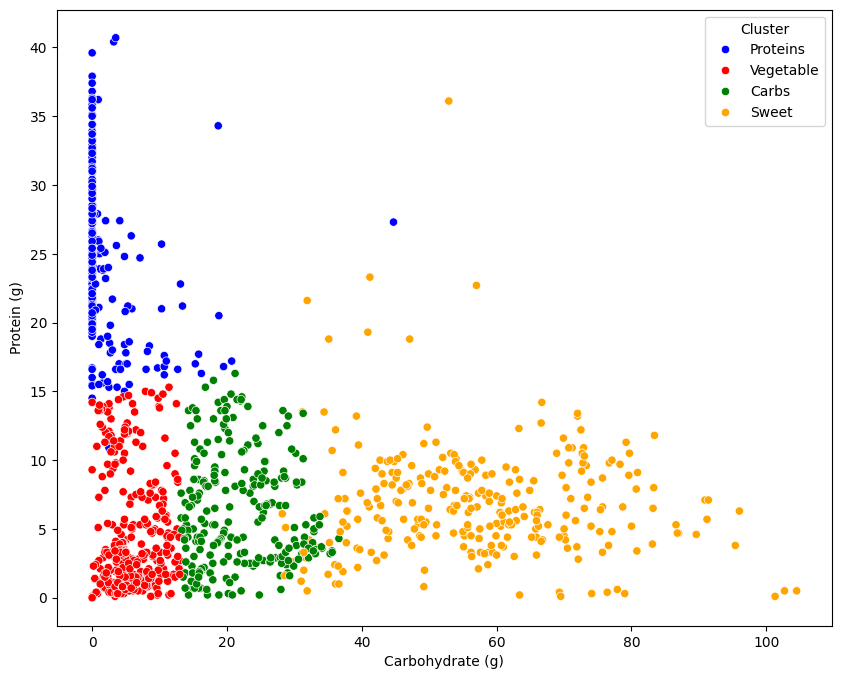

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Carbohydrate (g)', y='Protein (g)', hue='Cluster', data=df_clusters, palette=['blue', 'red', 'green', 'orange'])
plt.xlabel('Carbohydrate (g)')
plt.ylabel('Protein (g)')
plt.savefig('clusters_features.png')
plt.show()

In [ ]:
df_export = pd.merge(df, df_clusters[['Food Name', 'Cluster']], on='Food Name', how='left')

df_export

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
0,13-145,"Ackee, canned, drained",8 cans,DG,NaN,76.7,0.46,2.9,15.2,0.8,151.0,625.0,NaN,0.8,0.1,0.0,NaN,0.7,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,240.0,270.0,35.0,40.0,47.0,0.70,0.27,0.6,340.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.03,0.07,0.6,0.5,1.1,0.06,0.0,41.0,NaN,NaN,30.0,Vegetables,"Vegetables, general",NaN
1,13-146,"Agar, dried",Literature sources,DG,1.0,9.7,0.26,1.3,1.2,NaN,16.0,67.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,81.1,NaN,0.30,0.10,0.40,NaN,0.0,110.0,110.0,760.0,620.0,50.0,20.60,NaN,14.4,NaN,4.3,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.01,0.22,0.2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,Vegetables,"Vegetables, general",NaN
2,13-147,"Agar, dried, soaked and drained",Literature sources,DG,1.0,84.2,0.03,0.2,0.1,NaN,2.0,7.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,0.0,10.0,20.0,110.0,75.0,8.0,3.50,NaN,2.5,NaN,0.4,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.01,0.04,0.1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,Vegetables,"Vegetables, general",NaN
3,13-801,"Allspice, ground",Literature sources,H,1.0,8.5,0.98,6.1,8.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2.50,0.70,2.40,NaN,0.0,77.0,1040.0,660.0,130.0,110.0,7.10,0.55,1.0,NaN,1.7,NaN,NaN,0.0,325.0,54.0,0.0,NaN,0.10,0.06,2.9,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,Herbs and spices,Herbs and spices,NaN
4,14-870,"Almonds, flaked and ground",10 samples,GA,1.0,4.2,4.07,21.1,55.8,6.9,612.0,2534.0,2.7,4.2,NaN,NaN,NaN,4.2,0.0,0.0,0.0,7.4,NaN,4.43,38.19,10.46,0.00,0.0,14.0,780.0,240.0,270.0,550.0,3.00,1.00,3.2,18.0,1.7,2.0,2.0,0.0,0.0,0.0,0.0,23.96,0.21,0.75,3.1,3.4,6.5,0.15,0.0,48.0,0.44,64.0,0.0,Nuts and seeds,"Nuts and seeds, general",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,12-515,"Yogurt, whole milk, twin pot, not fruit",With biscuit pieces and chocolate-coated cereal pieces,BN,1.0,68.4,0.66,4.2,5.6,21.5,148.0,623.0,3.3,18.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.3,3.20,NaN,NaN,NaN,NaN,100.0,NaN,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milk and milk products,Yogurts,Carbs
2392,12-531,"Yogurt, whole milk, twin pot, thick and creamy with fruit","11 samples, 8 brands, various flavours",BN,1.0,74.7,0.71,4.1,3.2,16.2,106.0,446.0,0.6,15.6,2.3,0.6,2.2,6.9,0.2,3.5,0.0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,53.0,175.0,130.0,13.0,106.0,0.16,NaN,0.4,NaN,NaN,NaN,NaN,20.0,15.0,23.0,NaN,0.12,0.06,0.19,0.2,0.9,1.1,0.08,0.2,13.0,0.36,2.0,2.0,Milk and milk products,Yogurts,Carbs
2393,11-960,"Yorkshire pudding, made with semi-skimmed milk, homemade",Recipe,AT,1.0,58.1,1.10,6.7,8.3,25.6,197.0,830.0,22.1,3.5,NaN,NaN,NaN,0.1,0.0,3.3,0.0,0.9,1.1,1.89,1.95,3.74,0.05,52.3,52.0,181.0,119.0,16.0,124.0,0.80,0.05,0.7,127.0,0.2,5.0,29.0,30.0,6.0,31.0,0.4,3.07,0.08,0.21,0.5,1.5,2.0,0.08,1.0,9.0,0.59,5.3,2.0,Cereals and cereal products,Savouries,Carbs
2394,11-1135,"Yorkshire pudding, made with skimmed milk, homemade",Recipe,AT,1.0,60.1,1.12,6.8,7.4,25.9,190.0,801.0,22.3,3.6,NaN,NaN,NaN,0.1,0.0,3.4,NaN,0.9,1.1,1.23,1.72,3.78,NaN,51.2,54.

In [ ]:
df_export.dropna(subset=['Cluster'], inplace=True)

df_export

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
5,14-897,"Almonds, toasted",Literature sources,GA,1.00,2.4,4.05,21.0,52.5,5.9,579.0,2394.0,0.8,5.1,NaN,NaN,NaN,5.0,0.1,0.0,0.0,NaN,10.9,4.09,33.08,12.96,0.01,0.0,3.0,713.0,268.0,279.0,471.0,3.73,1.100,3.3,18.0,2.23,2.0,2.0,0.0,1.0,NaN,0.0,23.90,0.08,1.20,3.6,3.5,7.1,0.14,0.0,55.0,0.32,49.0,0.0,Nuts and seeds,"Nuts and seeds, general",Proteins
6,14-898,"Almonds, weighed with shells",Calculated from 14-896,GA,0.37,1.6,1.51,7.8,18.5,1.9,205.0,847.0,0.3,1.6,0.1,NaN,NaN,1.5,NaN,0.0,0.0,NaN,4.6,1.41,11.67,4.56,0.01,0.0,NaN,271.0,100.0,100.0,178.0,1.37,0.380,1.2,7.0,0.81,2.0,1.0,0.0,NaN,NaN,0.0,9.48,0.08,0.42,1.3,1.3,2.6,0.05,0.0,16.0,0.17,23.7,0.0,Nuts and seeds,"Nuts and seeds, general",Vegetable
7,14-896,"Almonds, whole kernels","Literature sources, Prunus dulcis",GA,1.00,4.4,4.09,21.2,49.9,5.3,554.0,2292.0,0.8,4.5,0.2,0.1,0.1,4.1,NaN,0.0,0.0,NaN,12.5,3.80,31.55,12.33,0.02,0.0,1.0,733.0,269.0,270.0,481.0,3.71,1.031,3.1,18.0,2.18,4.0,2.0,0.0,1.0,NaN,0.0,25.63,0.21,1.14,3.6,3.4,7.0,0.14,0.0,44.0,0.47,64.0,0.0,Nuts and seeds,"Nuts and seeds, general",Proteins
10,16-448,"Anchovies, canned in oil, drained","10 samples, 4 brands",JC,0.74,46.4,4.03,25.2,10.0,0.0,191.0,798.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.60,5.30,1.80,NaN,63.0,5870.0,230.0,300.0,56.0,300.0,4.10,0.170,3.0,9100.0,0.18,NaN,NaN,57.0,NaN,57.0,NaN,NaN,NaN,0.10,3.8,4.7,8.5,NaN,11.0,18.0,NaN,NaN,NaN,Fish and fish products,Fatty fish,Proteins
13,17-851,"Apple sauce, homemade",Recipe,WC,1.00,77.5,0.04,0.3,0.2,20.2,79.0,336.0,NaN,20.2,1.6,NaN,4.8,13.7,0.0,0.0,0.0,1.3,1.4,0.05,0.02,0.11,NaN,0.0,2.0,75.0,5.0,3.0,6.0,0.11,0.030,0.0,NaN,0.02,NaN,3.0,0.0,0.0,0.0,0.0,0.10,0.03,0.01,0.1,0.1,0.2,0.04,0.0,1.0,NaN,0.7,9.0,"Soups, sauces and miscellaneous foods",Sauces,Carbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,12-515,"Yogurt, whole milk, twin pot, not fruit",With biscuit pieces and chocolate-coated cereal pieces,BN,1.00,68.4,0.66,4.2,5.6,21.5,148.0,623.0,3.3,18.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.3,3.20,NaN,NaN,NaN,NaN,100.0,NaN,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milk and milk products,Yogurts,Carbs
2392,12-531,"Yogurt, whole milk, twin pot, thick and creamy with fruit","11 samples, 8 brands, various flavours",BN,1.00,74.7,0.71,4.1,3.2,16.2,106.0,446.0,0.6,15.6,2.3,0.6,2.2,6.9,0.2,3.5,0.0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,53.0,175.0,130.0,13.0,106.0,0.16,NaN,0.4,NaN,NaN,NaN,NaN,20.0,15.0,23.0,NaN,0.12,0.06,0.19,0.2,0.9,1.1,0.08,0.2,13.0,0.36,2.0,2.0,Milk and milk products,Yogurts,Carbs
2393,11-960,"Yorkshire pudding, made with semi-skimmed milk, homemade",Recipe,AT,1.00,58.1,1.10,6.7,8.3,25.6,197.0,830.0,22.1,3.5,NaN,NaN,NaN,0.1,0.0,3.3,0.0,0.9,1.1,1.89,1.95,3.74,0.05,52.3,52.0,181.0,119.0,16.0,124.0,0.80,0.050,0.7,127.0,0.20,5.0,29.0,30.0,6.0,31.0,0.4,3.07,0.08,0.21,0.5,1.5,2.0,0.08,1.0,9.0,0.59,5.3,2.0,Cereals and cereal products,Savouries,Carbs
2394,11-1135,"Yorkshire puddin

In [ ]:
print(df_export[df_export['Cluster'].isnull()])

Empty DataFrame
Columns: [Food Code, Food Name, Description, Group, Edible proportion, Water (g), Total nitrogen (g), Protein (g), Fat (g), Carbohydrate (g), Energy (kcal) (kcal), Energy (kJ) (kJ), Starch (g), Total sugars (g), Glucose (g), Galactose (g), Fructose (g), Sucrose (g), Maltose (g), Lactose (g), Alcohol (g), NSP (g), AOAC fibre (g), Satd FA /100g fd (g), Mono FA /100g food (g), Poly FA /100g food (g), Trans FAs /100g food (g), Cholesterol (mg), Sodium (mg), Potassium (mg), Calcium (mg), Magnesium (mg), Phosphorus (mg), Iron (mg), Copper (mg), Zinc (mg), Chloride (mg), Manganese (mg), Selenium (µg), Iodine (µg), Retinol (µg), Carotene (µg), Retinol Equivalent (µg), Vitamin D (µg), Vitamin E (mg), Thiamin (mg), Riboflavin (mg), Niacin (mg), Tryptophan/60 (mg), Niacin equivalent (mg), Vitamin B6 (mg), Vitamin B12 (µg), Folate (µg), Pantothenate (mg), Biotin (µg), Vitamin C (mg), category, subcategory, Cluster]
Index: []


In [ ]:
df_export.to_csv('df_cluster_v3.csv', encoding = 'utf-8-sig')
files.download('df_cluster_v3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
searchFood("Crackers, wholemeal, homemade", df_export)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
826,11-1134,"Crackers, wholemeal, homemade",Recipe,AM,1.0,3.2,1.7,9.8,10.5,76.7,421.0,1781.0,75.9,0.8,NaN,NaN,NaN,0.6,0.1,NaN,NaN,0.5,5.4,3.38,4.31,1.83,0.02,1.3,161.0,230.0,80.0,38.0,161.0,2.12,0.23,1.0,263.0,1.2,3.0,NaN,NaN,83.0,NaN,NaN,NaN,0.23,0.09,2.5,2.2,4.7,0.2,0.0,32.0,0.49,4.2,NaN,Cereals and cereal products,Biscuits,Sweet


In [ ]:
searchFood("Gelatine", df_export)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
1103,17-360,Gelatine,Literature sources,WY,1.0,13.0,15.2,84.4,0.0,0.0,338.0,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,7.0,250.0,15.0,32.0,2.1,0.05,0.2,NaN,0.13,19.0,6.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"Soups, sauces and miscellaneous foods",Miscellaneous foods,Proteins


In [ ]:
searchFood("Ghee made from vegetable oil", df_export)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
1104,12-502,Ghee made from vegetable oil,"5 samples, 3 products",BTM,1.0,NaN,0.02,0.1,100.0,0.0,900.0,3702.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,46.72,38.92,9.48,0.08,0.0,1.0,1.0,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,8.7,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,Milk and milk products,Milk and milk products,Vegetable


In [ ]:
searchFood("Sev/ganthia, homemade", df_export)

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
2107,17-836,"Sev/ganthia, homemade","Recipe, savoury Indian snack",SNC,1.0,4.1,2.99,18.8,25.1,47.1,478.0,2003.0,42.6,1.9,NaN,NaN,NaN,1.9,0.0,0.0,0.0,7.5,8.4,1.87,13.1,8.37,0.02,0.0,2.0,246.0,48.0,51.0,182.0,2.2,0.23,1.2,59.0,1.36,3.0,NaN,0.0,26.0,4.0,0.0,6.69,0.3,0.14,1.6,3.5,5.0,0.28,0.0,72.0,1.03,6.9,NaN,"Sugars, preserves and snacks",Savoury snacks,Sweet


# Rough work

## Utility Assignment

In [ ]:
df["utility"] = np.nan

### Per category

In [ ]:
np.random.seed(7)
var = "Vegetables"
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.03)]

In [ ]:
df.at[1013, 'utility'] = 4
df.at[1767, 'utility'] = 3
df.at[904, 'utility'] = 3
df.at[2378, 'utility'] = 6
df.at[869, 'utility'] = 7
df.at[146, 'utility'] = 5
df.at[1967, 'utility'] = 6
df.at[979, 'utility'] = 3
df.at[829, 'utility'] = 2
df.at[576, 'utility'] = 3
df.at[929, 'utility'] = 2
df.at[995, 'utility'] = 2
df.at[2203, 'utility'] = 8
df.at[542, 'utility'] = 6
df.at[1336, 'utility'] = 6
df.at[1729, 'utility'] = 4

In [ ]:
np.random.seed(7)
var = "Meat and meat products"
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.03)]

In [ ]:
df.at[1481, 'utility'] = 7
df.at[89, 'utility'] = 8
df.at[2162, 'utility'] = 8
df.at[2162, 'utility'] = 9
df.at[2614, 'utility'] = 6
df.at[1387, 'utility'] = 2
df.at[1078, 'utility'] = 7
df.at[1111, 'utility'] = 5
df.at[1460, 'utility'] = 8
df.at[680, 'utility'] = 7
df.at[2619, 'utility'] = 7
df.at[2617, 'utility'] = 5
df.at[768, 'utility'] = 9

In [ ]:
np.random.seed(11)
var = "Cereals and cereal products"
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.05)]

In [ ]:
df.at[2515, 'utility'] = 8
df.at[526, 'utility'] = 7
df.at[2541, 'utility'] = 6
df.at[2059, 'utility'] = 10 # fish? whatever
df.at[2397, 'utility'] = 7
df.at[648, 'utility'] = 7
df.at[1780, 'utility'] = 5
df.at[1899, 'utility'] = 6
df.at[2018, 'utility'] = 4
df.at[1160, 'utility'] = 4
df.at[899, 'utility'] = 8
df.at[1894, 'utility'] = 10
df.at[2368, 'utility'] = 9
df.at[2843, 'utility'] = 1

In [ ]:
np.random.seed(7)
var = "Fish and fish products"
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.05)]

In [ ]:
df.at[1323, 'utility'] = 6
df.at[2071, 'utility'] = 7
df.at[808, 'utility'] = 9
df.at[795, 'utility'] = 4
df.at[2759, 'utility'] = 6
df.at[118, 'utility'] = 6
df.at[2088, 'utility'] = 7
df.at[1539, 'utility'] = 7
df.at[1277, 'utility'] = 5
df.at[1274, 'utility'] = 7

In [ ]:
np.random.seed(3)
var = "Fruit"
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.05)]

In [ ]:
df.at[1977, 'utility'] = 6
df.at[2677, 'utility'] = 4
df.at[1610, 'utility'] = 6
df.at[1645, 'utility'] = 6
df.at[2262, 'utility'] = 4
df.at[2322, 'utility'] = 5
df.at[1203, 'utility'] = 8
df.at[1534, 'utility'] = 7

In [ ]:
np.random.seed(43)
var = 'Milk and milk products'
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.05)]

In [ ]:
df.at[2893, 'utility'] = 6
df.at[619, 'utility'] = 4
df.at[856, 'utility'] = 9
df.at[627, 'utility'] = 4
df.at[627, 'utility'] = 7
df.at[1338, 'utility'] = 10
df.at[612, 'utility'] = 3

In [ ]:
np.random.seed(42)
var = 'Soups, sauces and miscellaneous foods'
num = df[df["category"] == var].shape[0]
subset = df[df["category"] == var].sample(frac=1).iloc[:int(num * 0.05)]

In [ ]:
df.at[1996, 'utility'] = 7
df.at[2466, 'utility'] = 3
df.at[1813, 'utility'] = 5
df.at[2326, 'utility'] = 6
df.at[2829, 'utility'] = 10 # we love water
df.at[2572, 'utility'] = 2
df.at[744, 'utility'] = 6
df.at[2000, 'utility'] = 2

### Give utilities manually to some

### ML to predict the rest

In [ ]:
utility_df = df[df.utility.notna()]
non_utility_df = df[df.utility.isna()]
utility_df.shape  # still not enough, but whatever..... i fit ML model to see how it works

(74, 59)

In [ ]:
utility_df_copy = utility_df.copy()
non_utility_df_copy = non_utility_df.copy()

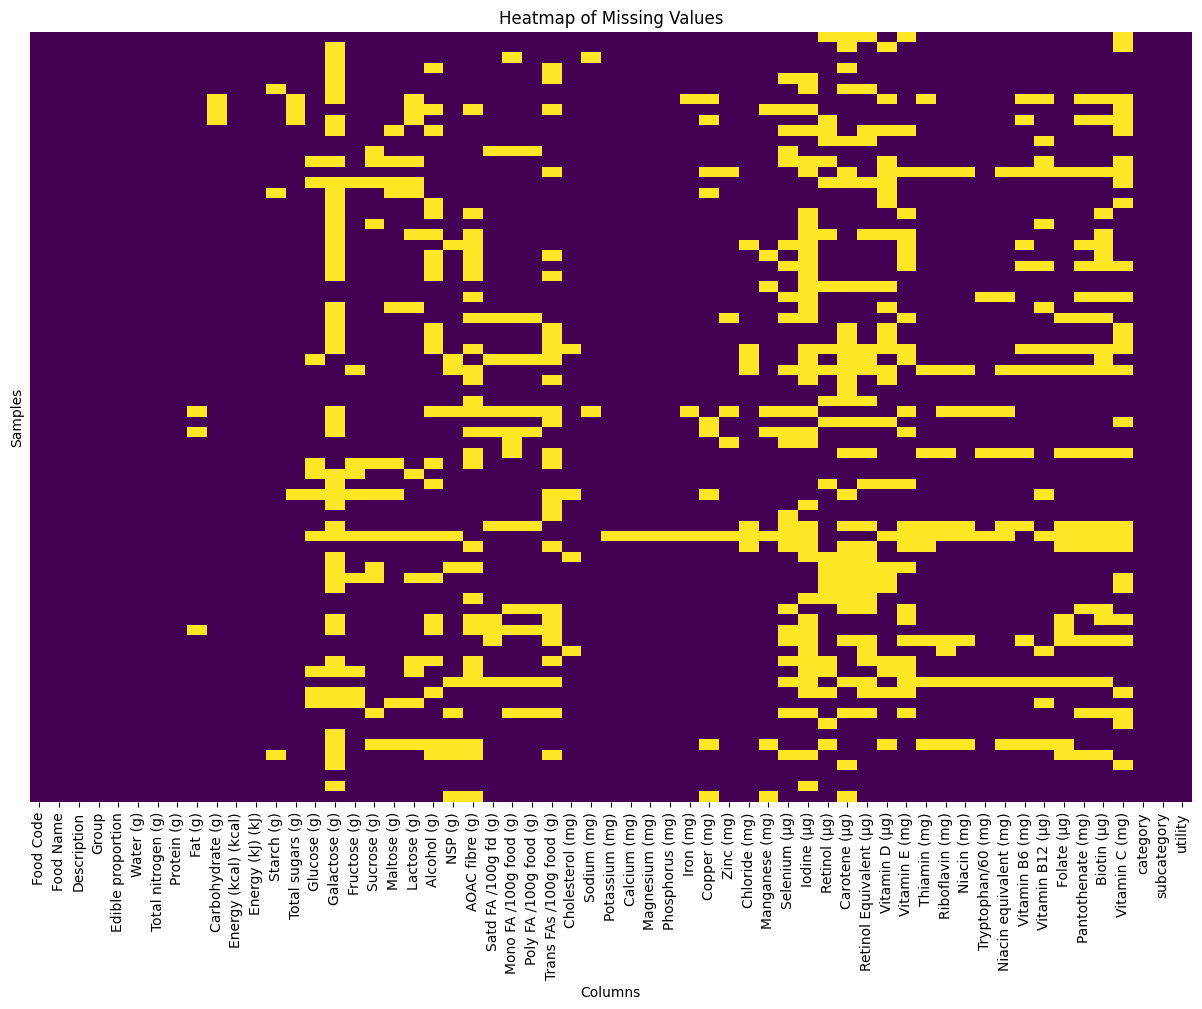

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(utility_df_copy.isna(),
            cmap='viridis',
            cbar=False,
            yticklabels=False)

# Add title and labels
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Samples")

# Show the plot
plt.show()

In [ ]:
categorical_cols = {"Food Code", "Food Name", "Description", "Group", "category", "subcategory"}
numeric_cols = utility_df_copy.columns.difference(categorical_cols)

for col in numeric_cols:
    utility_df_copy[col] = pd.to_numeric(utility_df_copy[col], errors='coerce')
    non_utility_df_copy[col] = pd.to_numeric(non_utility_df_copy[col], errors='coerce')

In [ ]:
from sklearn.impute import SimpleImputer

categorical_cols = list(categorical_cols)

mode_imputer = SimpleImputer(strategy="most_frequent")
median_imputer = SimpleImputer(strategy="median")

# Fit the imputers on utility_df (training set)
utility_df_copy[categorical_cols] = mode_imputer.fit_transform(utility_df_copy[categorical_cols])
utility_df_copy[numeric_cols] = median_imputer.fit_transform(utility_df_copy[numeric_cols])

# Impute non_utility_df (test set) using the fitted imputers
non_utility_df_copy[categorical_cols] = mode_imputer.transform(non_utility_df_copy[categorical_cols])
non_utility_df_copy[numeric_cols] = median_imputer.transform(non_utility_df_copy[numeric_cols])

# One-hot encode the 'category' column for both DataFrames
utility_df_copy = pd.get_dummies(utility_df_copy, columns=['category'], prefix='cat', drop_first=True)
non_utility_df_copy = pd.get_dummies(non_utility_df_copy, columns=['category'], prefix='cat', drop_first=True)

In [ ]:
assert utility_df_copy.isna().sum().sum() == 0
assert non_utility_df_copy.isna().sum().sum() == 0

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

no_train_cols = ['Food Code', 'Food Name', 'Description', 'Group', 'subcategory', 'utility']
# note: Food name being dropped, but it is probably the most informative col if we do a bit of NLP on that and get embedding

train, test = train_test_split(utility_df_copy, test_size=0.2, random_state=41)
X_train = train.drop(columns=no_train_cols) # also drop subcategory bc we have few samples and hot encoding will overfit; we have cateogry anyway
y_train = train["utility"]
X_test = test.drop(columns=no_train_cols)
y_test = test["utility"]
X_to_predict = non_utility_df_copy.drop(columns=no_train_cols)

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

def perform_kfold_grid_search(model, param_grid, X_train, y_train, folds=5):
    """
    Performs grid search with k-fold cross-validation to find the best hyperparameters.

    Parameters:
        model: The machine learning estimator to optimize.
        param_grid (dict): Dictionary with parameter names as keys and lists of parameter settings to try.
        X_train: Training feature data.
        y_train: Training target data.
        folds (int, optional): Number of cross-validation folds. Default is 3.

    Returns:
        dict: Best parameters found by grid search.
    """
    kfold = KFold(n_splits=folds, shuffle=True, random_state=41)
    grid_search = GridSearchCV(model, param_grid, cv=kfold, verbose=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best parameters:")
    print(best_params)
    return best_params


def perform_kfold_random_search(model, param_dist, X_train, y_train, folds=5, n_iter=10):
    """
    Performs randomized search with k-fold cross-validation to find the best hyperparameters.

    Parameters:
        model: The machine learning estimator to optimize.
        param_dist (dict): Dictionary with parameters names as keys and lists/ranges of parameter settings to sample.
        X_train: Training feature data.
        y_train: Training target data.
        folds (int, optional): Number of cross-validation folds. Default is 3.
        n_iter (int, optional): Number of parameter settings sampled. Default is 20.

    Returns:
        dict: Best parameters found by randomized search.
    """
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=41)
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter,
                                       cv=kfold, verbose=1, random_state=41, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    print("Best param:")
    print(best_params)
    return best_params


def xg_boost(X_train, y_train, X_test, y_test, random_search=1):
    """
    Trains and evaluates an XGBoost regressor with hyperparameter tuning.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series or array-like): Training target data.
        X_test (pd.DataFrame): Testing feature data.
        y_test (pd.Series or array-like): Testing target data.

    Returns:
        dict: A dictionary containing the trained model and evaluation metrics.
    """
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    # Perform random or grid search
    if random_search:
        grid_search = RandomizedSearchCV(
            XGBRegressor(random_state=41),
            param_distributions=param_grid,
            cv=3,
            verbose=2,
            scoring='neg_mean_squared_error',
            random_state=41
        )
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
    else:
        best_params = perform_kfold_grid_search(XGBRegressor(random_state=41), param_grid, X_train, y_train)

    print("Best Parameters from search:", best_params)

    # Train the final model with the best parameters
    final_xgb_regressor = XGBRegressor(random_state=41, **best_params)
    final_xgb_regressor.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = final_xgb_regressor.predict(X_train)
    y_test_pred = final_xgb_regressor.predict(X_test)

    # Clip predictions to [0, 10] range
    y_train_pred = np.clip(y_train_pred, 0, 10)
    y_test_pred = np.clip(y_test_pred, 0, 10)

    # Calculate regression metrics
    metrics = {
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "test_mae": mean_absolute_error(y_test, y_test_pred),
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred)
    }

    print("Evaluation Metrics:", metrics)

    return final_xgb_regressor

In [ ]:
best_xgb = xg_boost(X_train, y_train, X_test, y_test, random_search=1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.001, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsamp

In [ ]:
# NEGATIVE TEST R2, SHITTY. BUT LET'S KEEP GOING TO MIO FORMULATION FIRST, AND THE WE CAN IMPROVE THAT

In [ ]:
missing_cols_in_to_predict = set(X_train.columns) - set(X_to_predict.columns)
extra_cols_in_to_predict = set(X_to_predict.columns) - set(X_train.columns)

print("Missing columns in X_to_predict:", missing_cols_in_to_predict)
print("Extra columns in X_to_predict:", extra_cols_in_to_predict)

Missing columns in X_to_predict: set()
Extra columns in X_to_predict: {'cat_Eggs', 'cat_Herbs and spices', 'cat_Sugars, preserves and snacks', 'cat_Nuts and seeds'}


In [ ]:
X_to_predict = X_to_predict[X_train.columns]  # bad practice, but there are few samples in some cateories and these are not seen in train probably

In [ ]:
non_utility_df.utility = best_xgb.predict(X_to_predict)

<ipython-input-99-513ec0b0fbc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_utility_df.utility = best_xgb.predict(X_to_predict)


In [ ]:
df = pd.concat([non_utility_df, utility_df])

### Utility check

In [ ]:
df[df.utility >= 8]

,Food Code,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Glucose (g),Galactose (g),Fructose (g),Sucrose (g),Maltose (g),Lactose (g),Alcohol (g),NSP (g),AOAC fibre (g),Satd FA /100g fd (g),Mono FA /100g food (g),Poly FA /100g food (g),Trans FAs /100g food (g),Cholesterol (mg),Sodium (mg),Potassium (mg),Calcium (mg),Magnesium (mg),Phosphorus (mg),Iron (mg),Copper (mg),Zinc (mg),Chloride (mg),Manganese (mg),Selenium (µg),Iodine (µg),Retinol (µg),Carotene (µg),Retinol Equivalent (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Tryptophan/60 (mg),Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,utility
326,17-356,Bicarbonate of soda,As sodium bicarbonate,WY,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,NaN,0.0,27380.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,"Soups, sauces and miscellaneous foods",Miscellaneous foods,8.523644
356,19-114,"Black pudding, dry-fried","8 samples, 6 brands",MI,1.0,44.3,1.65,10.3,21.5,16.6,297.0,1236.0,16.4,0.2,0.1,NaN,NaN,0.1,NaN,NaN,0.0,0.2,NaN,8.50,8.10,3.60,NaN,68.0,940.0,110.0,120.0,16.0,80.0,12.30,0.11,0.7,1560.0,NaN,6.0,5.000,41.0,NaN,41.0,0.7,0.24,0.09,0.07,1.0,2.8,3.8,0.04,1.0,5.0,0.60,2.0,0.0,Meat and meat products,Meat products,8.587635
480,19-493,"Burger, Big Mac, takeaway","Includes two beefburgers, bun, sauce, cheese, lettuce, onions and pickles",MBG,1.0,NaN,2.09,13.1,11.2,20.9,232.0,972.0,17.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.9,4.70,4.60,1.70,0.10,23.0,390.0,142.0,68.0,22.0,142.0,0.90,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.3,0.23,0.05,0.11,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,1.0,Meat and meat products,Burgers and grillsteaks,8.759467
485,19-487,"Burger, Quarter Pounder with cheese, takeaway","Portion includes a quarter pound beefburger, ketchup, mustard, onions, pickles and slice of cheese",MBG,1.0,NaN,2.61,16.3,13.2,21.2,263.0,1102.0,15.6,5.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.6,6.80,5.60,0.90,0.10,33.0,463.0,168.0,110.0,22.0,141.0,1.00,NaN,NaN,354.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.14,0.04,0.12,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,Meat and meat products,Burgers and grillsteaks,8.307723
582,13-637,"Celery, boiled in unsalted water","Calculated from raw. Water analysed, 2017. 11 samples, UK, including whole heads, hearts and sticks, stem only. Sliced and boiled for 5-10 minutes",DG,1.0,97.1,0.04,0.3,0.1,0.8,5.1,21.0,NaN,0.8,0.6,0.0,0.2,NaN,0.0,0.0,0.0,0.6,0.8,NaN,0.02,0.04,0.00,0.0,43.0,170.0,23.0,4.0,11.0,0.03,0.01,NaN,118.0,0.03,NaN,0.616,0.0,11.0,2.0,0.0,0.03,0.01,0.01,0.1,NaN,0.1,0.01,0.0,4.0,0.13,NaN,NaN,Vegetables,"Vegetables, general",8.274944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,18-548,"Pork, shoulder joint (collar), pot-roasted, lean and fat",Calculated from 67% lean and 32% fat,MAG,1.0,55.9,3.91,24.4,18.0,0.0,260.0,1081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.70,6.90,3.20,0.10,92.0,64.0,280.0,9.0,20.0,190.0,1.00,0.10,3.3,60.0,0.01,15.0,NaN,NaN,NaN,NaN,1.1,0.23,0.48,0.25,4.2,4.6,8.8,0.32,0.5,3.0,1.56,6.0,0.0,Meat and meat products,Pork,9.000000
2203,13-557,"Potato chips, microwave, cooked","10 samples, 2 brands; cooked as packet directions",DAP,1.0,50.4,0.58,3.6,9.6,32.1,221.0,930.0,31.5,0.6,0.2,0.0,0.1,0.3,0.0,0.0,0.0,2.9,2.9,0.55,NaN,NaN,NaN,0.0,40.0,530.0,17.0,30.0,99.0,1.00,0.14,0.4,64.0,0.20,NaN,1.000,0.0,NaN,NaN,0.0,NaN,0.12,0.07,2.1,0.9,3.0,0.29,0.0,20.0,NaN,NaN,11.0,Vegetables,Potatoes,8.000000
2368,11-999,"Risotto, plain, homemade",Recipe,AT,1.0,56.2,0.55,3.3,4.7,35.6,184.0,778.0,34.3,1.0,0.3,0.0,0.3,0.4